In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

In [ ]:
bad_ids = pd.read_csv('bad_ids.csv')['id_card'].values
df = pd.read_csv('./inno_stats/09_groups.csv')
df = df[~df['id_card'].isin(bad_ids)]

df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


## TASK 1. <br>
#### H0: Buying discounted products DOESNT depend on the average order sum

In [ ]:
id2avg_sum = df.groupby('id_doc')['sum'].mean()

In [ ]:
id2green_cnt = df.groupby("id_doc")['is_green'].sum()
green_buyers = id2green_cnt.index[id2green_cnt.to_numpy().nonzero()]
nongreen_buyers = list(set(id2green_cnt.index).difference(green_buyers))

In [ ]:
ttest_ind(id2avg_sum[green_buyers], id2avg_sum[nongreen_buyers])

Ttest_indResult(statistic=-379.1254533395915, pvalue=0.0)

H0 rejected. There is a dependency between discounted products and average order sum.

## TASK 2. <br>
Prove that the frequency of shopping grows around the wage taking days

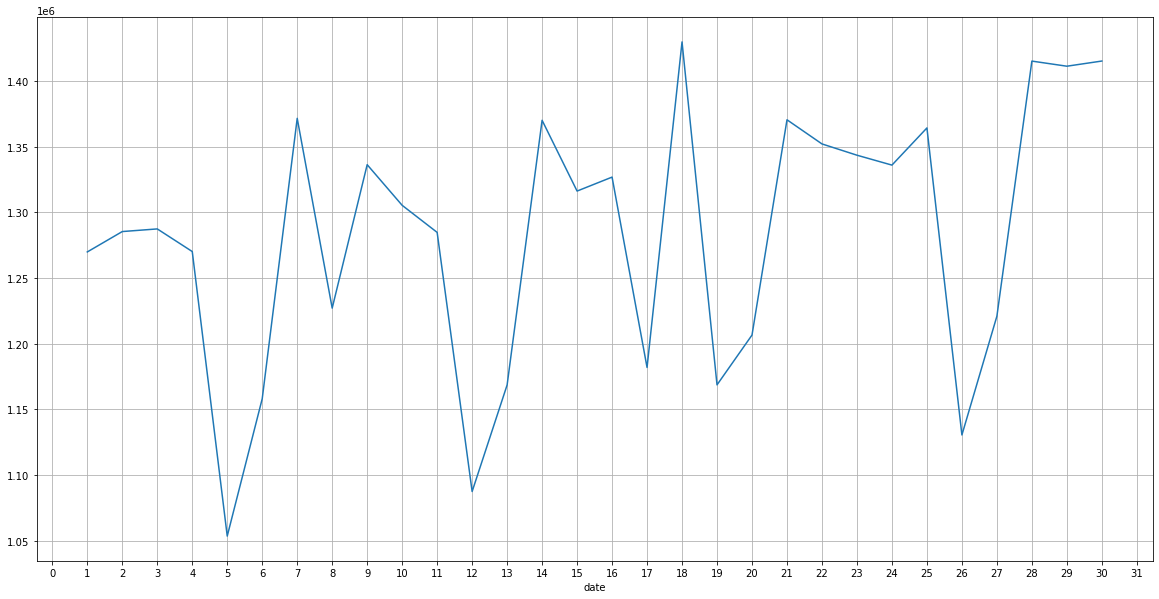

In [ ]:
df.index = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')
num_of_buyings = df.groupby(df.index.day)['id_order'].count()

plt.figure(figsize=(20,10))
plt.locator_params(axis="x", nbins=50)
num_of_buyings.plot()
plt.grid()

At the pay day 5 and 20 we see local minima. After 1-2 days, the number of purchases is growing.

## TASK 3. <br>
Define cohort existence

### Frequent buyers - The users that are shopping frequently

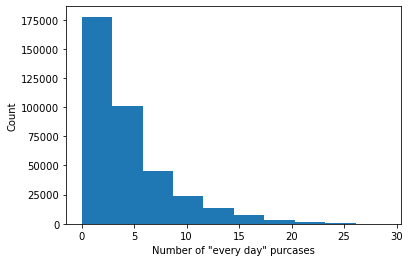

In [ ]:
df['date'] = df.index.date

def compute_diffs(sub_df):
    dates = set(sub_df['date'])
    dates = sorted(dates)
    diffs = np.diff(dates)
    return [diff.days for diff in diffs]

cnt_orders = df.groupby('id_card')['id_order'].count()
regular_customers = cnt_orders[cnt_orders > 15].index
regular_orders = df[df['id_card'].isin(regular_customers)]
diffs = regular_orders.groupby('id_card').apply(compute_diffs)
diffs = diffs[diffs.apply(len) > 4]
num_of_delta_one = diffs.apply(lambda arr: len([e for e in arr if e == 1]))


plt.hist(num_of_delta_one)
plt.xlabel('Number of "every day" purcases')
plt.ylabel('Count');

As we can see there are customers that buy somethning almost every day. However the majority doesn't do that.

### Average purchase sum - The customers that usually spend the same amount of mone

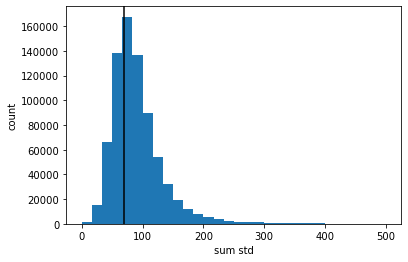

In [ ]:
users_stds = df.groupby('id_card')['sum'].std()
users_cnt = df.groupby('id_card')['sum'].count()

is_customer_regular = users_cnt > 10
regular_customers = is_customer_regular.index[np.where(is_customer_regular)[0]]
regular_customers_stds = users_stds[regular_customers]
regular_customers_stds = regular_customers_stds[regular_customers_stds < 500]

plt.axvline(x=70, color='k')
plt.xlabel('sum std')
plt.ylabel('count')
plt.hist(regular_customers_stds, bins=30);

We can define "Average purchase sum" such customers that have more than 10 purchases and std of sum less than 70.

### Usual cart - The customers grouped by the product groups

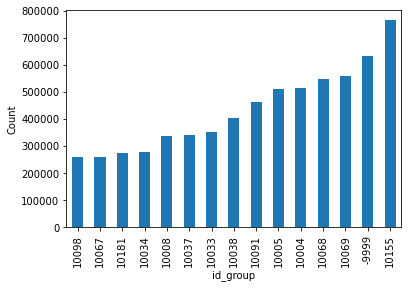

In [ ]:
group2num_customers = df.groupby('id_group')['id_card'].unique().apply(len)
group2num_customers.sort_values()[-15:].plot(kind='bar')
plt.ylabel('Count');

We can see that there's a lot of customers that grouped by diffrent product groups

Thank you, for your Attention!